## Name : Pranav Narkhede
## Assignment Week-5


Import libraries

In [185]:
# Data Analysis
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


# Import data



In [186]:
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test.csv")

In [187]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [189]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


# Data description


- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. 

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

## Data types, missing data 

In [190]:
# Non-null count and data types of the training and test set
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
# Missing data in training set 

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

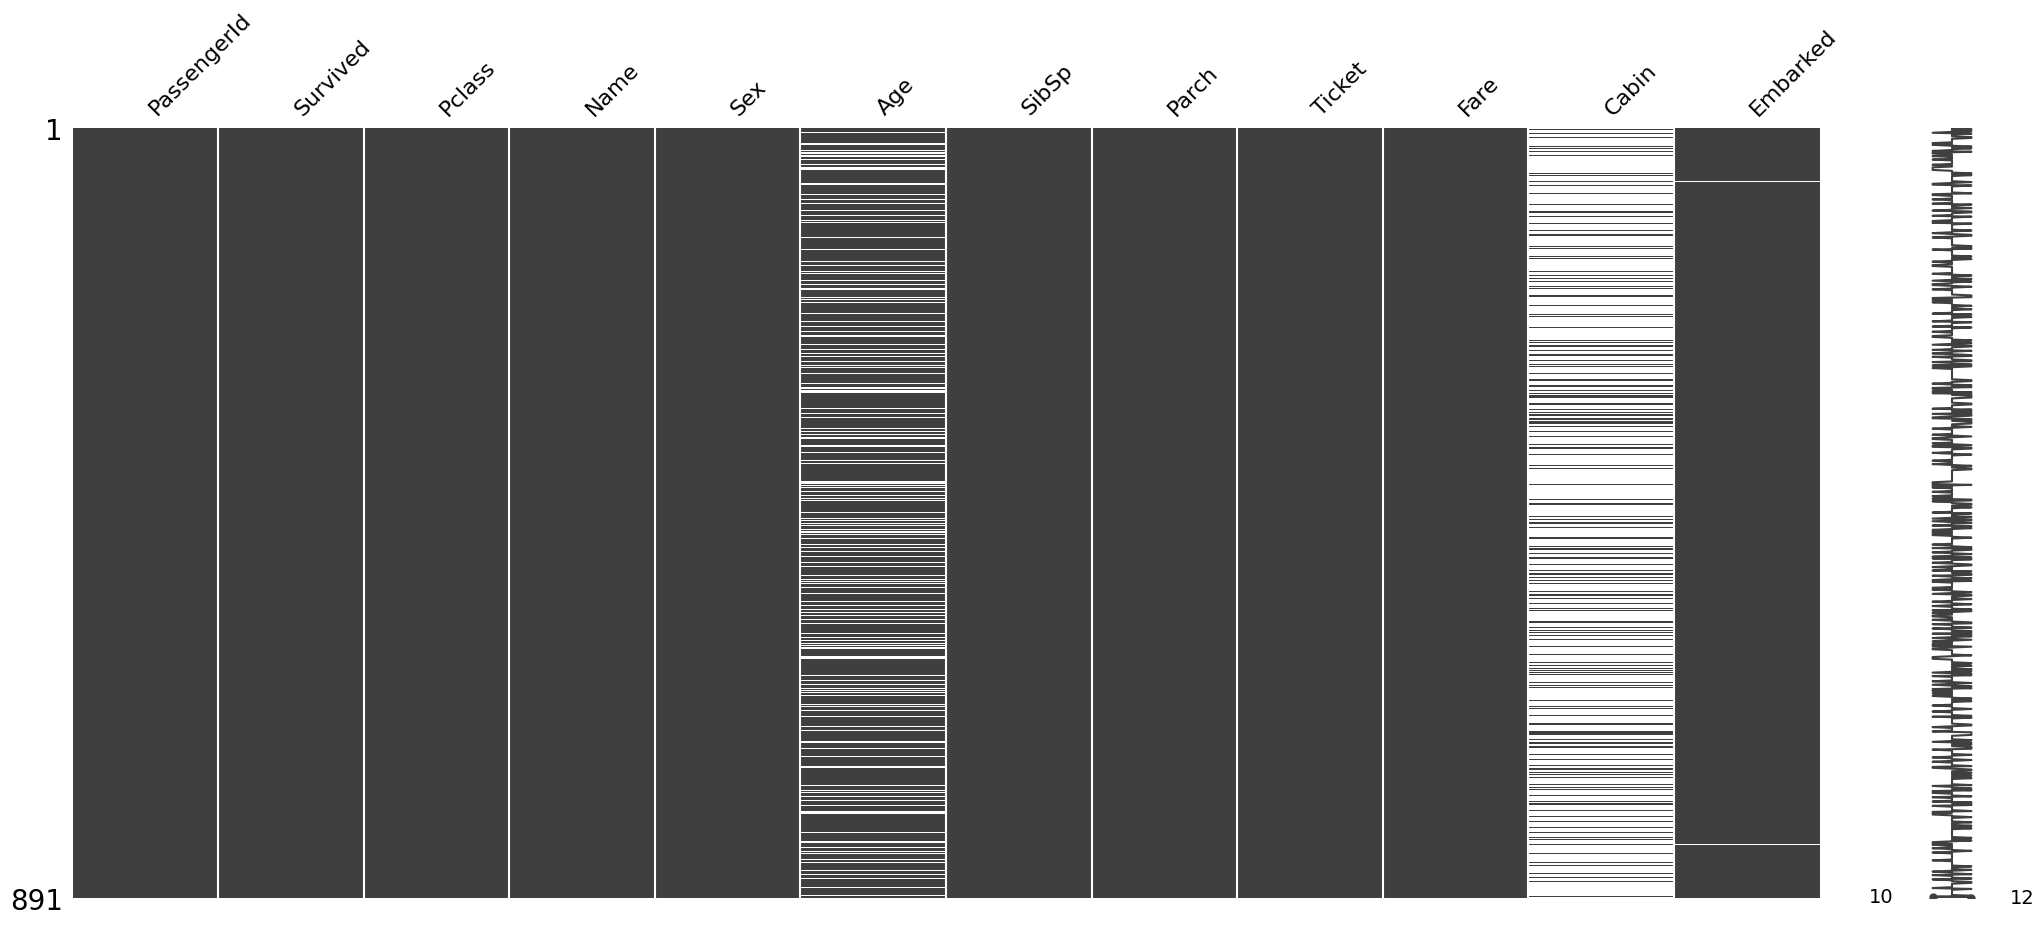

In [192]:
# Missing data in training set(Alternate Method)

missingno.matrix(train)

<Axes: >

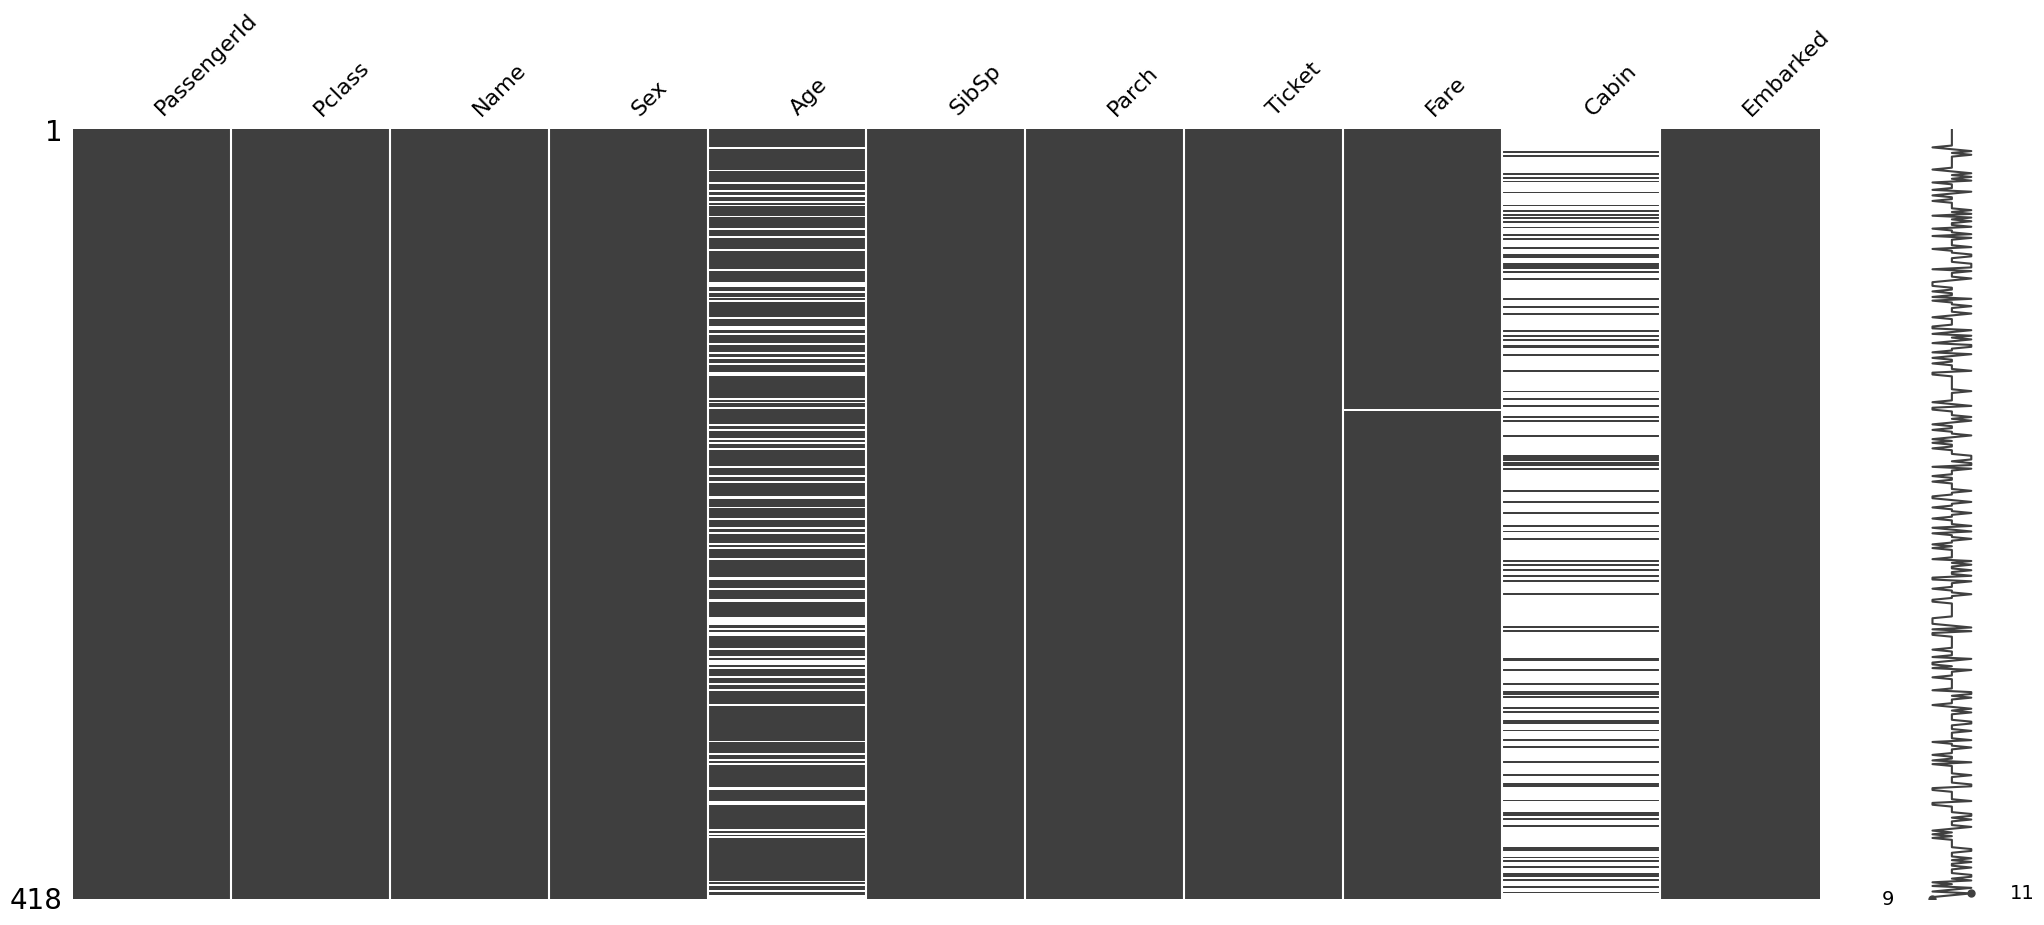

In [193]:
# Missing data in test set 

missingno.matrix(test)

In [194]:
# Summary 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##  Categorical variables



## Handle Column: Sex

In [195]:
train['Sex'].value_counts(dropna = False)

# There are more male passengers than female passengers on titanic

Sex
male      577
female    314
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Probability(Gender)')

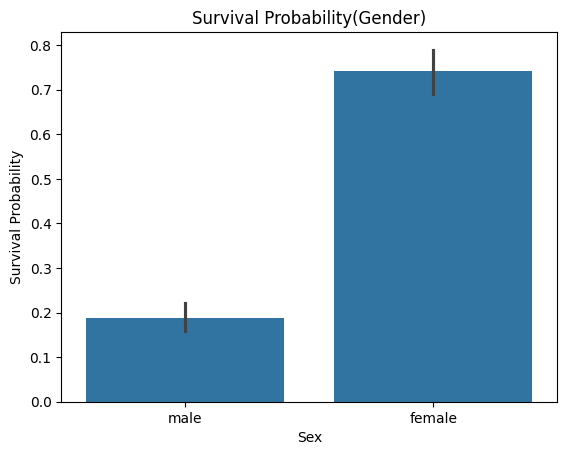

In [196]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability(Gender)')

# Female passengers are more likely to survive

## Column: Pclass

In [197]:
# Value counts of the Pclass column 
train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

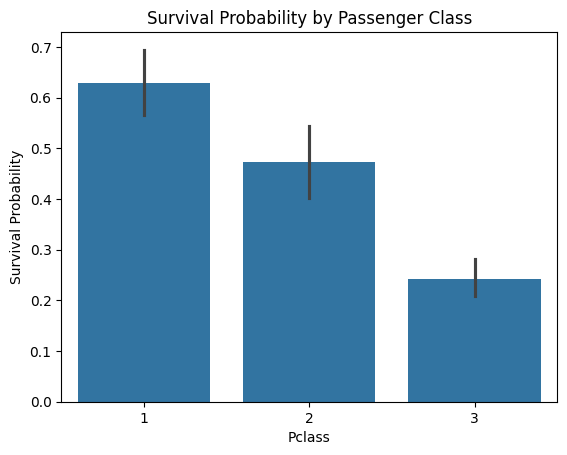

In [198]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Survival probability decrease with passenger class, first class passengers were evacuated first.

## Column: Embarked

In [199]:
train['Embarked'].value_counts(dropna = False)



Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Probability on Embark')

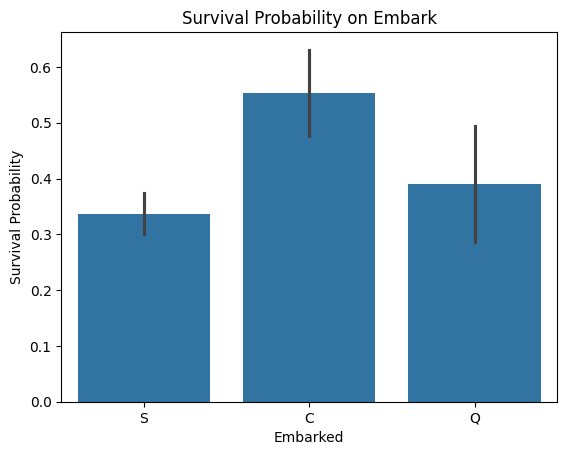

In [200]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability on Embark')

##  Numerical variables

In [201]:
#Remove Outliers

def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [202]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<Axes: >

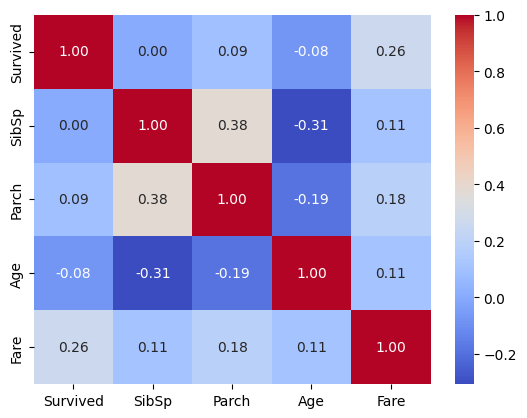

In [203]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare is more  correlated with survival

## Column: SibSp

In [204]:
train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Probability by SibSp')

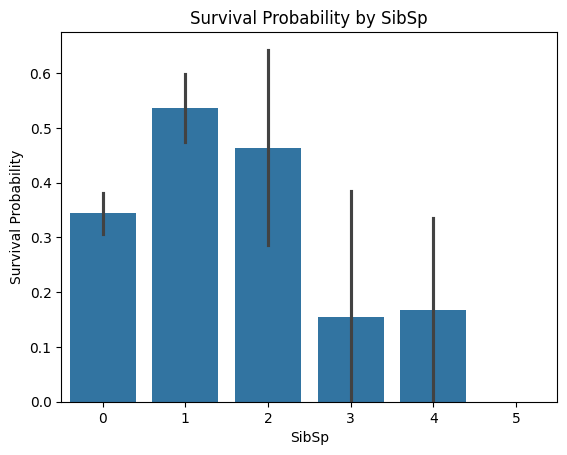

In [205]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

## Column: Parch

In [206]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Parch')

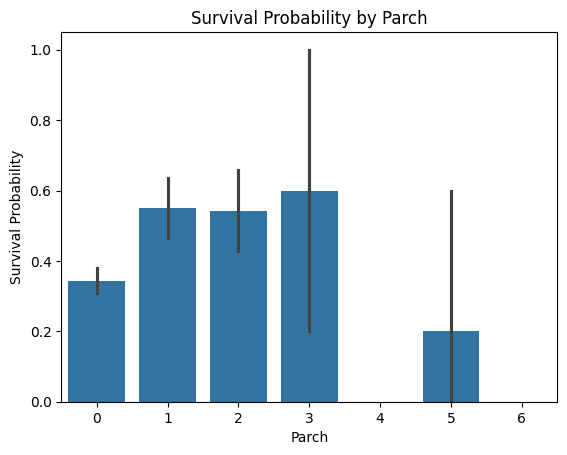

In [207]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

## Column: Age

In [208]:
# Null values 
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

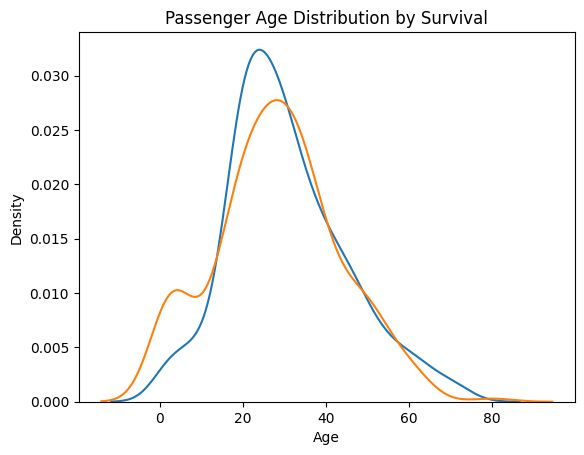

In [209]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

## Column: Fare

In [210]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

#  Data preprocessing

## Drop and fill missing values

In [211]:
#Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [212]:
# Missing values in training set 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [213]:
# most frequent value of Embarked
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [214]:
# Fill missing value in Embarked with mode
train['Embarked'].fillna(mode, inplace = True)

In [215]:
# Missing values in test set
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [216]:
# Fill missing value in Fare with median
test['Fare'].fillna(median, inplace = True)

In [217]:
# Combine training set and test set
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [218]:
# Missing values in the combined dataset
combine.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [219]:
# Convert Sex into numerical values where 0 = male and 1 = female
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

In [220]:
combine.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [221]:
combine['Age'] = combine['Age'].fillna(combine['Age'].median())


##  Data transformation

Text(0.5, 1.0, 'Passenger Fare Distribution')

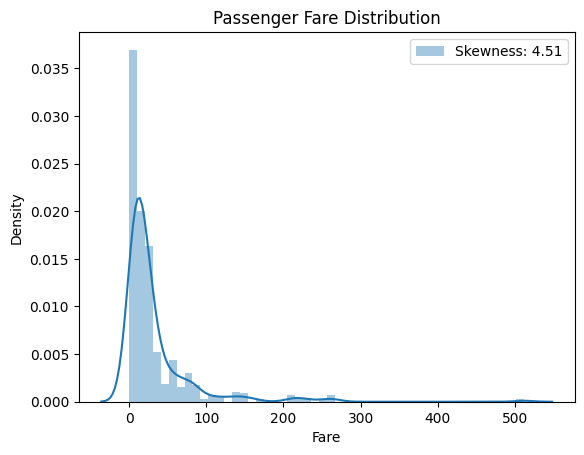

In [222]:
# Passenger fare distribution
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [223]:
# Apply log transformation to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

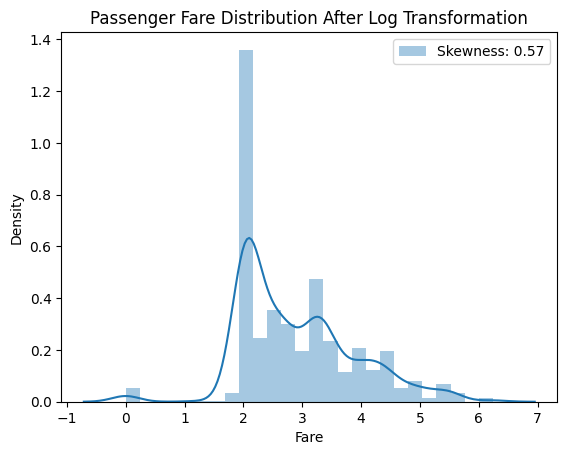

In [224]:
# Passenger fare distribution after  transformation
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## Feature engineering

In [225]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [226]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [227]:
# Value counts of Title

combine['Title'].value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [228]:
# Number of unique Title

combine['Title'].nunique()

18

<Axes: xlabel='count', ylabel='Title'>

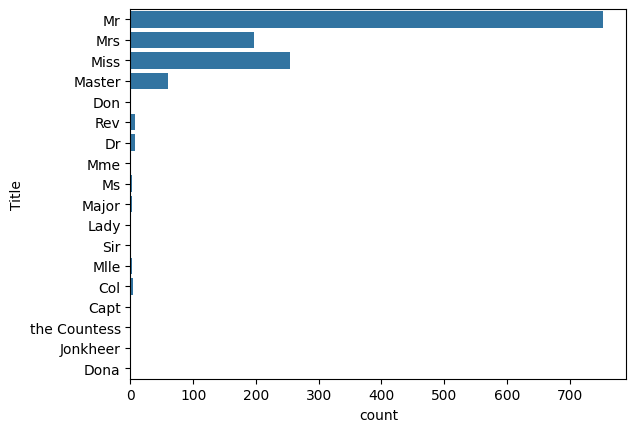

In [229]:
sns.countplot(combine['Title'])

In [230]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


##  Feature encoding 



In [231]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [232]:
# Title and Embarked feature
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combine['Title'] = label_encoder.fit_transform(combine['Title'])
combine['Embarked'] = label_encoder.fit_transform(combine['Embarked'])
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,2,12
1,2,1.0,1,1,38.0,1,0,4.266662,0,13
2,3,1.0,3,1,26.0,0,0,2.070022,2,9
3,4,1.0,1,1,35.0,1,0,3.972177,2,13
4,5,0.0,3,0,35.0,0,0,2.085672,2,12


In [233]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,2,12
1,2,1.0,1,1,38.0,1,0,4.266662,0,13
2,3,1.0,3,1,26.0,0,0,2.070022,2,9
3,4,1.0,1,1,35.0,1,0,3.972177,2,13
4,5,0.0,3,0,35.0,0,0,2.085672,2,12


In [234]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [235]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,2,12
1,2,1.0,1,1,38.0,1,0,4.266662,0,13
2,3,1.0,3,1,26.0,0,0,2.070022,2,9
3,4,1.0,1,1,35.0,1,0,3.972177,2,13
4,5,0.0,3,0,35.0,0,0,2.085672,2,12


In [236]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,1.981001,2,12
1,1.0,1,1,38.0,1,0,4.266662,0,13
2,1.0,3,1,26.0,0,0,2.070022,2,9
3,1.0,1,1,35.0,1,0,3.972177,2,13
4,0.0,3,0,35.0,0,0,2.085672,2,12


In [237]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,1.981001,2,12
1,1,1,1,38.0,1,0,4.266662,0,13
2,1,3,1,26.0,0,0,2.070022,2,9
3,1,1,1,35.0,1,0,3.972177,2,13
4,0,3,0,35.0,0,0,2.085672,2,12


In [238]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
881,892,NaN,3,0,34.5,0,0,2.057860,1,12
882,893,NaN,3,1,47.0,1,0,1.945910,2,13
883,894,NaN,2,0,62.0,0,0,2.270836,1,12
884,895,NaN,3,0,27.0,0,0,2.159003,2,12
885,896,NaN,3,1,22.0,1,1,2.508582,2,13


In [239]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
881,892,3,0,34.5,0,0,2.057860,1,12
882,893,3,1,47.0,1,0,1.945910,2,13
883,894,2,0,62.0,0,0,2.270836,1,12
884,895,3,0,27.0,0,0,2.159003,2,12
885,896,3,1,22.0,1,1,2.508582,2,13


## Split training data


In [240]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 8)
Y_train shape:  (881,)
X_test shape:  (418, 8)
